<ipython-input-1-4fcd75d9fa8b>:7: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/anaconda3/lib/python3.8/si

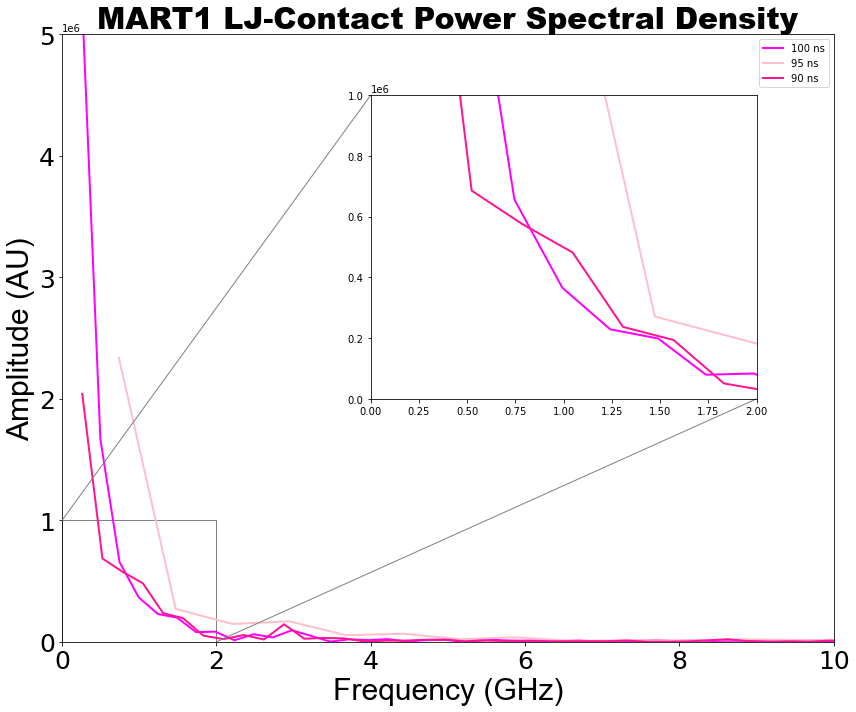

In [1]:
#FFT Denoise
#Equilibration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)


#TCR-MHC H_Number vs Time

t, ha, haa = [], [], []

with open("/Users/zrollins/Box/DMF5_MART1/M1+/100/num_contactsDEA.xvg") as f:
    #lines = (line for line in f if not line.startsiwith('#') if not line.startswith('$'))
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 3:
            t.append(float(cols[0]))
            ha.append(float(cols[1]))
            haa.append(float(cols[2]))



#TCR-peptide H_Number vs Time

t, hc, hcc = [], [], []

with open("/Users/zrollins/Box/DMF5_MART1/M1+/100/num_contactsDEC.xvg") as f:
    #lines = (line for line in f if not line.startsiwith('#') if not line.startswith('$'))
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 3:
            t.append(float(cols[0]))
            hc.append(float(cols[1]))
            hcc.append(float(cols[2]))


#95 ns
#TCR-MHC H_Number vs Time

t1, ha1, haa1 = [], [], []

with open("/Users/zrollins/Box/DMF5_MART1/M1+/95/num_contactsDEA.xvg") as f:
    #lines = (line for line in f if not line.startsiwith('#') if not line.startswith('$'))
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 3:
            t1.append(float(cols[0]))
            ha1.append(float(cols[1]))
            haa1.append(float(cols[2]))



#TCR-peptide H_Number vs Time

t1, hc1, hcc1 = [], [], []

with open("/Users/zrollins/Box/DMF5_MART1/M1+/95/num_contactsDEC.xvg") as f:
    #lines = (line for line in f if not line.startsiwith('#') if not line.startswith('$'))
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 3:
            t1.append(float(cols[0]))
            hc1.append(float(cols[1]))
            hcc1.append(float(cols[2]))
            
#90 ns
#TCR-MHC H_Number vs Time

t2, ha2, haa2 = [], [], []

with open("/Users/zrollins/Box/DMF5_MART1/M1+/90/num_contactsDEA.xvg") as f:
    #lines = (line for line in f if not line.startsiwith('#') if not line.startswith('$'))
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 3:
            t2.append(float(cols[0]))
            ha2.append(float(cols[1]))
            haa2.append(float(cols[2]))



#TCR-peptide H_Number vs Time

t2, hc2, hcc2 = [], [], []

with open("/Users/zrollins/Box/DMF5_MART1/M1+/90/num_contactsDEC.xvg") as f:
    #lines = (line for line in f if not line.startsiwith('#') if not line.startswith('$'))
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 3:
            t2.append(float(cols[0]))
            hc2.append(float(cols[1]))
            hcc2.append(float(cols[2]))
            
# FFT EQ vs Pulls
h = ha + hc
h1 = ha1 + hc1
h2 = ha2 + hc2
dt=0.001
n = len(t)
n1 = len(t1)
n2 = len(t2)
fhat=np.fft.fft(h,n)
fhat1=np.fft.fft(h1,n1)
fhat2=np.fft.fft(h2,n2)
PSD = fhat * np.conj(fhat) / n
PSD1 = fhat1 * np.conj(fhat1) / n1
PSD2 = fhat2 * np.conj(fhat2) / n2
freq = (1/(dt*n)) * np.arange(n)
freq1 = (1/(dt*n1))*np.arange(n1)
freq2 = (1/(dt*n2))*np.arange(n2)
L = np.arange(1, np.floor(n/2), dtype='int')
L1 = np.arange(1, np.floor(n1/2), dtype='int')
L2 = np.arange(1, np.floor(n2/2), dtype='int')

fig,axs = plt.subplots(1,1)

plt.plot(freq[L],PSD[L], color='magenta',LineWidth=2,label='100 ns')
plt.plot(freq1[L1],PSD1[L1], color='pink',LineWidth=2,label='95 ns')
plt.plot(freq2[L2],PSD2[L2], color='deeppink',LineWidth=2,label='90 ns')
#plt.plot(freqeq[Leq],PSDeq[Leq], color='black',LineWidth=2,label='EQ')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.xlim(0,10)
plt.ylim(0,5000000)
plt.legend()
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Frequency (GHz)', fontname = 'Arial', fontsize=30)
plt.ylabel('Amplitude (AU)', fontname = 'Arial', fontsize=30)
plt.title('MART1 LJ-Contact Power Spectral Density', fontname = 'Arial Black', fontsize=30)

ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(axs, [0.4,0.4,0.5,0.5])
ax2.set_axes_locator(ip)
mark_inset(axs, ax2, loc1=2,loc2=4, fc="none",ec='0.5')

ax2.plot(freq[L],PSD[L], color='magenta',LineWidth=2,label='100 ns')
ax2.plot(freq1[L1],PSD1[L1], color='pink',LineWidth=2,label='95 ns')
ax2.plot(freq2[L2],PSD2[L2], color='deeppink',LineWidth=2,label='90 ns')
ax2.set_xlim(0,2)
ax2.set_ylim(0,1000000)

fig.set_figheight(10)
fig.set_figwidth(12)
fig.tight_layout()
plt.savefig('/Users/zrollins/Box/DMF5_MART1/M1+/PSD_c.png', dpi=300)
plt.show()


/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=or

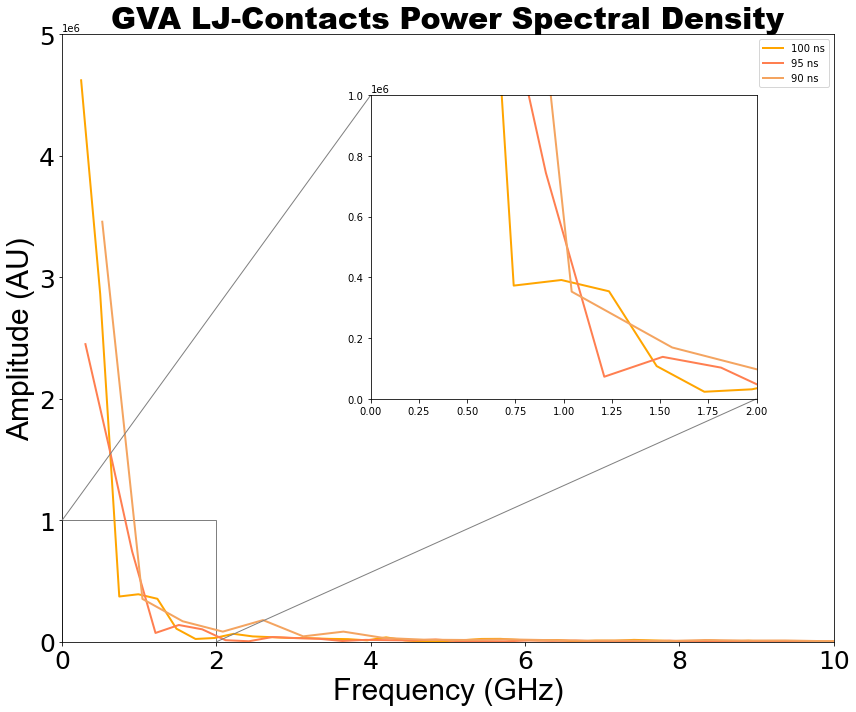

In [2]:
#FFT Denoise
#Equilibration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)


#TCR-MHC H_Number vs Time

t, ha, haa = [], [], []

with open("/Users/zrollins/Box/DMF5_MART1/GVA+/100/num_contactsDEA.xvg") as f:
    #lines = (line for line in f if not line.startsiwith('#') if not line.startswith('$'))
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 3:
            t.append(float(cols[0]))
            ha.append(float(cols[1]))
            haa.append(float(cols[2]))



#TCR-peptide H_Number vs Time

t, hc, hcc = [], [], []

with open("/Users/zrollins/Box/DMF5_MART1/GVA+/100/num_contactsDEC.xvg") as f:
    #lines = (line for line in f if not line.startsiwith('#') if not line.startswith('$'))
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 3:
            t.append(float(cols[0]))
            hc.append(float(cols[1]))
            hcc.append(float(cols[2]))

#95 ns
#TCR-MHC H_Number vs Time

t1, ha1, haa1 = [], [], []

with open("/Users/zrollins/Box/DMF5_MART1/GVA+/95/num_contactsDEA.xvg") as f:
    #lines = (line for line in f if not line.startsiwith('#') if not line.startswith('$'))
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 3:
            t1.append(float(cols[0]))
            ha1.append(float(cols[1]))
            haa1.append(float(cols[2]))



#TCR-peptide H_Number vs Time

t1, hc1, hcc1 = [], [], []

with open("/Users/zrollins/Box/DMF5_MART1/GVA+/95/num_contactsDEC.xvg") as f:
    #lines = (line for line in f if not line.startsiwith('#') if not line.startswith('$'))
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 3:
            t1.append(float(cols[0]))
            hc1.append(float(cols[1]))
            hcc1.append(float(cols[2]))
            
#90 ns
#TCR-MHC H_Number vs Time

t2, ha2, haa2 = [], [], []

with open("/Users/zrollins/Box/DMF5_MART1/GVA+/90/num_contactsDEA.xvg") as f:
    #lines = (line for line in f if not line.startsiwith('#') if not line.startswith('$'))
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 3:
            t2.append(float(cols[0]))
            ha2.append(float(cols[1]))
            haa2.append(float(cols[2]))



#TCR-peptide H_Number vs Time

t2, hc2, hcc2 = [], [], []

with open("/Users/zrollins/Box/DMF5_MART1/GVA+/90/num_contactsDEC.xvg") as f:
    #lines = (line for line in f if not line.startsiwith('#') if not line.startswith('$'))
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 3:
            t2.append(float(cols[0]))
            hc2.append(float(cols[1]))
            hcc2.append(float(cols[2]))
            
# FFT EQ vs Pulls
h = ha + hc
h1 = ha1 + hc1
h2 = ha2 + hc2
dt=0.001
n = len(t)
n1 = len(t1)
n2 = len(t2)
fhat=np.fft.fft(h,n)
fhat1=np.fft.fft(h1,n1)
fhat2=np.fft.fft(h2,n2)
PSD = fhat * np.conj(fhat) / n
PSD1 = fhat1 * np.conj(fhat1) / n1
PSD2 = fhat2 * np.conj(fhat2) / n2
freq = (1/(dt*n)) * np.arange(n)
freq1 = (1/(dt*n1))*np.arange(n1)
freq2 = (1/(dt*n2))*np.arange(n2)
L = np.arange(1, np.floor(n/2), dtype='int')
L1 = np.arange(1, np.floor(n1/2), dtype='int')
L2 = np.arange(1, np.floor(n2/2), dtype='int')

fig,axs = plt.subplots(1,1)


plt.plot(freq[L],PSD[L], color='orange',LineWidth=2,label='100 ns')
plt.plot(freq1[L1],PSD1[L1], color='coral',LineWidth=2,label='95 ns')
plt.plot(freq2[L2],PSD2[L2], color='sandybrown',LineWidth=2,label='90 ns')
#plt.plot(freqeq[Leq],PSDeq[Leq], color='black',LineWidth=2,label='EQ')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.xlim(0,10)
plt.ylim(0,5000000)
plt.legend()
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Frequency (GHz)', fontname = 'Arial', fontsize=30)
plt.ylabel('Amplitude (AU)', fontname = 'Arial', fontsize=30)
plt.title('GVA LJ-Contacts Power Spectral Density', fontname = 'Arial Black', fontsize=30)

ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(axs, [0.4,0.4,0.5,0.5])
ax2.set_axes_locator(ip)
mark_inset(axs, ax2, loc1=2,loc2=4, fc="none",ec='0.5')

ax2.plot(freq[L],PSD[L], color='orange',LineWidth=2,label='100 ns')
ax2.plot(freq1[L1],PSD1[L1], color='coral',LineWidth=2,label='95 ns')
ax2.plot(freq2[L2],PSD2[L2], color='sandybrown',LineWidth=2,label='90 ns')
ax2.set_xlim(0,2)
ax2.set_ylim(0,1000000)

fig.set_figheight(10)
fig.set_figwidth(12)
fig.tight_layout()
plt.savefig('/Users/zrollins/Box/DMF5_MART1/GVA+/PSD_c.png', dpi=300)
plt.show()



/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=or

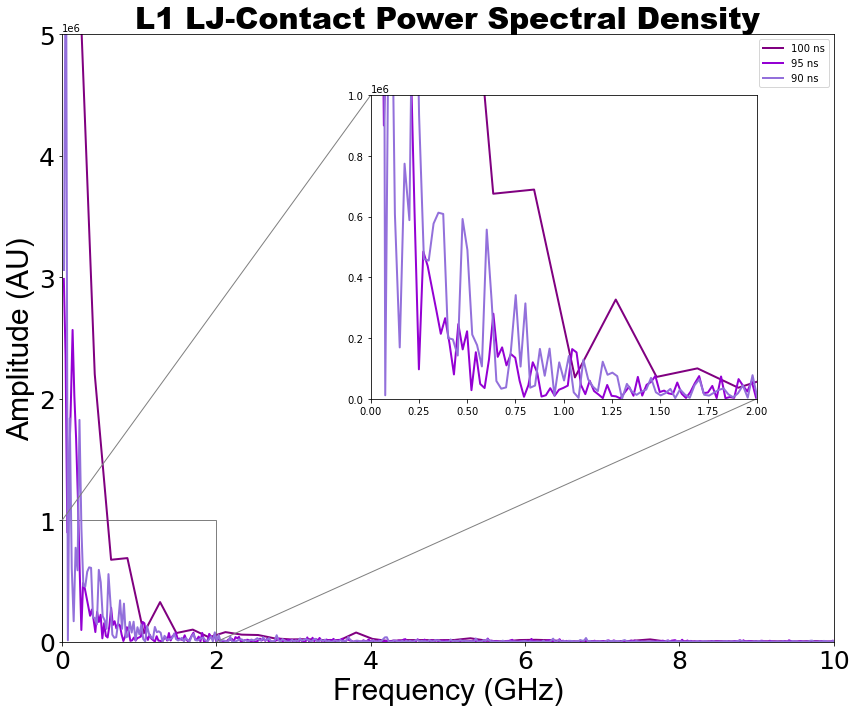

In [3]:
#FFT Denoise
#Equilibration

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)



#TCR-MHC H_Number vs Time

t, ha, haa = [], [], []

with open("/Users/zrollins/Box/DMF5_MART1/L1+/100/num_contactsDEA.xvg") as f:
    #lines = (line for line in f if not line.startsiwith('#') if not line.startswith('$'))
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 3:
            t.append(float(cols[0]))
            ha.append(float(cols[1]))
            haa.append(float(cols[2]))



#TCR-peptide H_Number vs Time

t, hc, hcc = [], [], []

with open("/Users/zrollins/Box/DMF5_MART1/L1+/100/num_contactsDEC.xvg") as f:
    #lines = (line for line in f if not line.startsiwith('#') if not line.startswith('$'))
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 3:
            t.append(float(cols[0]))
            hc.append(float(cols[1]))
            hcc.append(float(cols[2]))


#95 ns
#TCR-MHC H_Number vs Time

t1, ha1, haa1 = [], [], []

with open("/Users/zrollins/Box/DMF5_MART1/L1+/95/num_contactsDEA.xvg") as f:
    #lines = (line for line in f if not line.startsiwith('#') if not line.startswith('$'))
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 3:
            t1.append(float(cols[0]))
            ha1.append(float(cols[1]))
            haa1.append(float(cols[2]))



#TCR-peptide H_Number vs Time

t1, hc1, hcc1 = [], [], []

with open("/Users/zrollins/Box/DMF5_MART1/L1+/95/num_contactsDEC.xvg") as f:
    #lines = (line for line in f if not line.startsiwith('#') if not line.startswith('$'))
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 3:
            t1.append(float(cols[0]))
            hc1.append(float(cols[1]))
            hcc1.append(float(cols[2]))
            
#90 ns
#TCR-MHC H_Number vs Time

t2, ha2, haa2 = [], [], []

with open("/Users/zrollins/Box/DMF5_MART1/L1+/90/num_contactsDEA.xvg") as f:
    #lines = (line for line in f if not line.startsiwith('#') if not line.startswith('$'))
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 3:
            t2.append(float(cols[0]))
            ha2.append(float(cols[1]))
            haa2.append(float(cols[2]))



#TCR-peptide H_Number vs Time

t2, hc2, hcc2 = [], [], []

with open("/Users/zrollins/Box/DMF5_MART1/L1+/90/num_contactsDEC.xvg") as f:
    #lines = (line for line in f if not line.startsiwith('#') if not line.startswith('$'))
    for line in f:
        if line.startswith('#'):
            continue
        if line.startswith('@'):
            continue
        cols = line.split()

        if len(cols) == 3:
            t2.append(float(cols[0]))
            hc2.append(float(cols[1]))
            hcc2.append(float(cols[2]))
            
# FFT EQ vs Pulls
h = ha + hc
h1 = ha1 + hc1
h2 = ha2 + hc2
dt=0.001
n = len(t)
n1 = len(t1)
n2 = len(t2)
fhat=np.fft.fft(h,n)
fhat1=np.fft.fft(h1,n1)
fhat2=np.fft.fft(h2,n2)
PSD = fhat * np.conj(fhat) / n
PSD1 = fhat1 * np.conj(fhat1) / n1
PSD2 = fhat2 * np.conj(fhat2) / n2
freq = (1/(dt*n)) * np.arange(n)
freq1 = (1/(dt*n1))*np.arange(n1)
freq2 = (1/(dt*n2))*np.arange(n2)
L = np.arange(1, np.floor(n/2), dtype='int')
L1 = np.arange(1, np.floor(n1/2), dtype='int')
L2 = np.arange(1, np.floor(n2/2), dtype='int')

fig,axs = plt.subplots(1,1)

plt.plot(freq[L],PSD[L], color='purple',LineWidth=2,label='100 ns')
plt.plot(freq1[L1],PSD1[L1], color='darkviolet',LineWidth=2,label='95 ns')
plt.plot(freq2[L2],PSD2[L2], color='mediumpurple',LineWidth=2,label='90 ns')
#plt.plot(freqeq[Leq],PSDeq[Leq], color='black',LineWidth=2,label='EQ')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.xlim(0,10)
plt.ylim(0,5000000)
plt.legend()
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Frequency (GHz)', fontname = 'Arial', fontsize=30)
plt.ylabel('Amplitude (AU)', fontname = 'Arial', fontsize=30)
plt.title('L1 LJ-Contact Power Spectral Density', fontname = 'Arial Black', fontsize=30)

ax2 = plt.axes([0,0,1,1])
ip = InsetPosition(axs, [0.4,0.4,0.5,0.5])
ax2.set_axes_locator(ip)
mark_inset(axs, ax2, loc1=2,loc2=4, fc="none",ec='0.5')

ax2.plot(freq[L],PSD[L], color='purple',LineWidth=2,label='100 ns')
ax2.plot(freq1[L1],PSD1[L1], color='darkviolet',LineWidth=2,label='95 ns')
ax2.plot(freq2[L2],PSD2[L2], color='mediumpurple',LineWidth=2,label='90 ns')
ax2.set_xlim(0,2)
ax2.set_ylim(0,1000000)

fig.set_figheight(10)
fig.set_figwidth(12)
fig.tight_layout()
plt.savefig('/Users/zrollins/Box/DMF5_MART1/L1+/PSD_c.png',dpi=300)
plt.show()

